In [1]:
import pandas as pd
import sys
sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")

from functions_ThermoModel import (
    load_btc_data,
    cubic_regression,
    logarithmic_regression,
    optimize_params,
    create_cubiclog,
    weight_plot,
    final_plot, 
    inference
)

import warnings
warnings.filterwarnings("ignore")


df, last_date = load_btc_data(train_frac = 0.95, last_date = True)

# Cubic Regression

In [2]:
df, cubic_model_params = cubic_regression(
    df,
    upper=1.05,
    lower=-1.05,
    visualize_plot=False,
)

cubic_model_params

{'degrees': 3,
 'coef': [0.0,
  0.0044569267200456255,
  -5.954309150851394e-07,
  2.6827062689621572e-11],
 'intercept': -0.06517566153441212}

# Logarithmic Regression

In [3]:
df, log_model_params = logarithmic_regression(
    df,
    upper=2,
    lower=-2,
    visualize_plot=False,
)

log_model_params

{'coef': 2.8798392866831763, 'intercept': -14.737370870085734}

# ENSEMBLE

In [4]:
# Dates for optimization
tops_dates = pd.to_datetime(["2011-06-08","2013-11-30", "2017-12-17", "2021-04-14"])
bottoms_dates = pd.to_datetime(["2012-06-04","2013-01-07","2016-08-02", "2018-12-15", "2022-12-31"])

initial_guess = [0.7, 0.72, -0.3, -0.05]
bounds = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Run optimization
optimized_params = optimize_params(df, tops_dates, bottoms_dates, initial_guess, bounds)
optimized_params

array([ 0.27063017,  0.61172525,  1.        , -0.51843402])

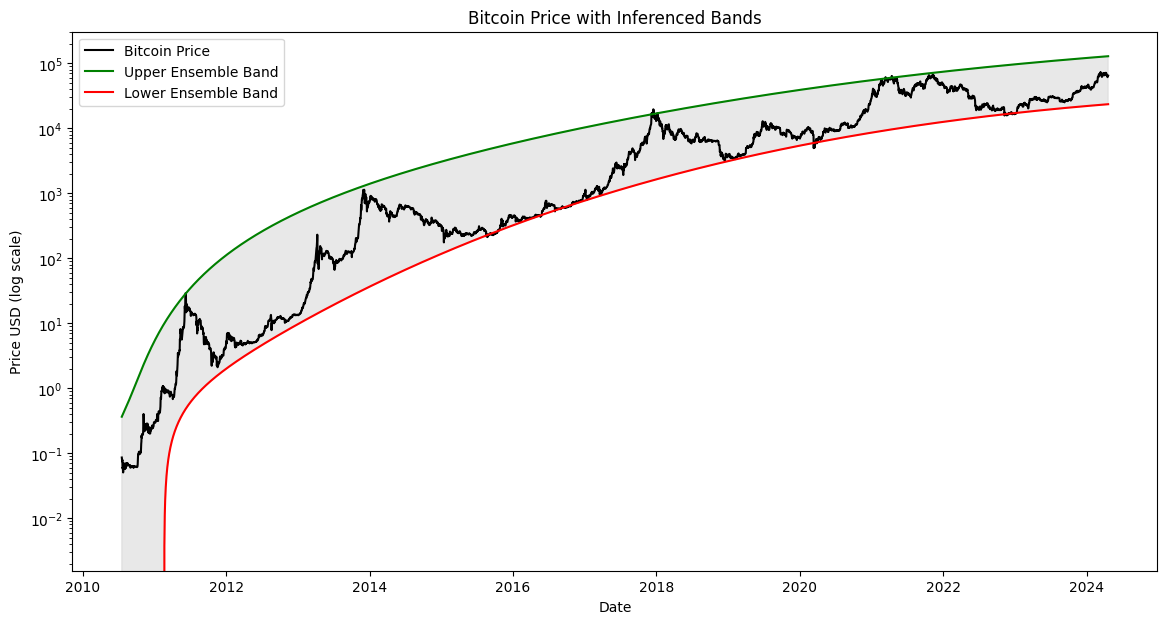

In [5]:
# Load the full dataset
df = load_btc_data(train_frac=1.0, last_date = False)
inference(df, cubic_model_params, log_model_params, optimized_params)

# create_cubiclog(df, optimized_params)

In [6]:
df

,time,PriceUSD,upper_cubic,lower_cubic,upper_log,lower_log,weights_upper,weights_lower,upper_cubiclog,lower_cubiclog,medium_cubiclog,sell_cubiclog,buy_cubiclog,75_cubiclog,25_cubiclog,Oscillator_cubiclog,lowess
0,2010-07-18,0.085840,1.558141,-0.653793,-0.999997,-1.000000,0.466684,-0.190721,0.364298,-0.587764,NaN,NaN,NaN,NaN,NaN,0.690403,NaN
1,2010-07-19,0.080800,1.569563,-0.652247,-0.999978,-1.000000,0.466709,-0.190759,0.370334,-0.585911,NaN,NaN,NaN,NaN,NaN,0.690403,NaN
2,2010-07-20,0.074736,1.581033,-0.650695,-0.999930,-0.999999,0.466735,-0.190797,0.376408,-0.584049,NaN,NaN,NaN,NaN,NaN,0.690403,NaN
3,2010-07-21,0.079193,1.592551,-0.649136,-0.999841,-0.999997,0.466760,-0.190835,0.382527,-0.582180,NaN,NaN,NaN,NaN,NaN,0.690403,NaN
4,2010-07-22,0.058470,1.604118,-0.647571,-0.999697,-0.999994,0.466785,-0.190873,0.388697,-0.580303,NaN,NaN,NaN,NaN,NaN,0.690403,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,2024-04-16,63784.820334,120365.556013,16288.841950,133707.881886,2447.963597,0.611593,-0.518022,128525.635560,23458.714575,54909.436349,108422.946438,27808.192815,84007.560404,35890.176857,0.588089,0.596516
5022,2024-04-17,61324.218429,120426.477131,16297.086727,133784.570888,2449.368205,0.611626,-0.518125,128596.640219,23471.930394,54940.070878,108482.963548,27823.828640,84054.199944,35910.298237,0.564633,0.594762
5023,2024-04-18,63510.145003,120487.383014,16305.329442,133861.288595,2450.773339,0.611659,-0.518228,128667.657582,23485.144504,54970.706120,108542.989513,27839.462916,84100.844182,35930.418544,0.584898,0.595802
5024,2024-04-19,63762.631030,120548.273628,16313.570090,133938.035012,2452.178998,0.611692,-0.518331,128738.687644,23498.356900,55001.342066,108603.024325,27855.095637,84147.493107,35950.537768,0.586903,0.596940


In [7]:
#weight_plot(df)

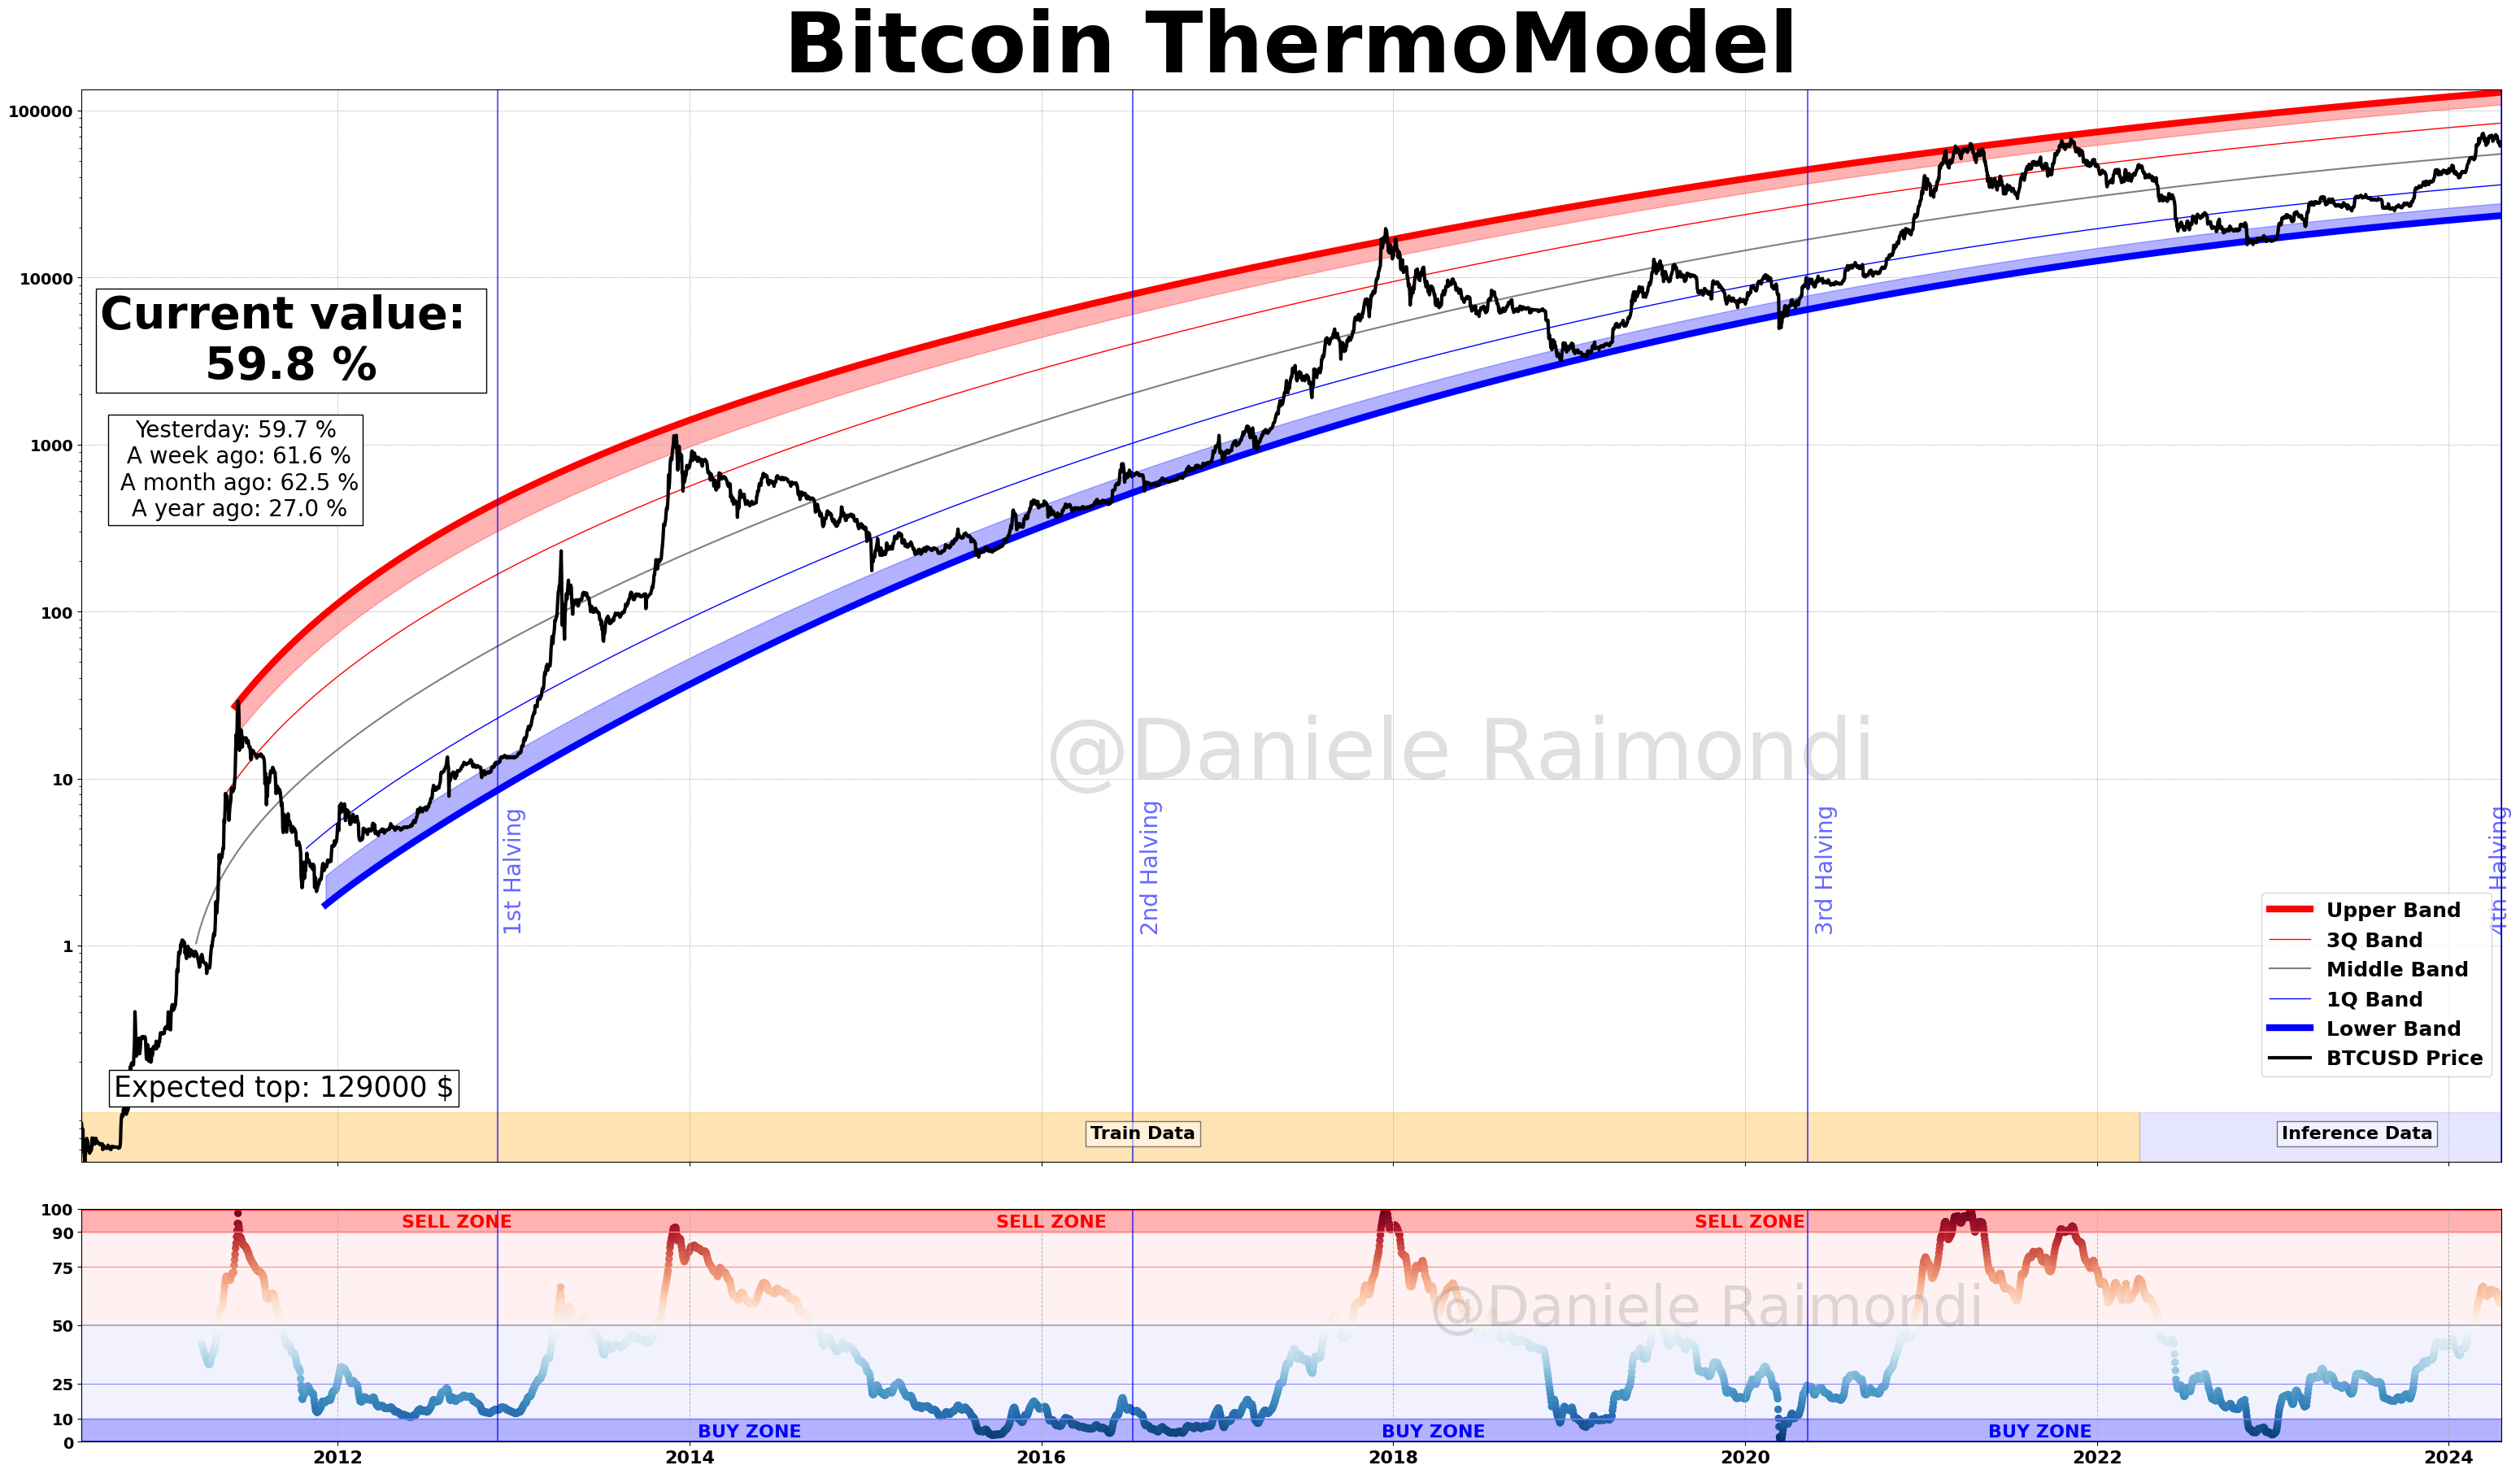

In [8]:
final_plot(df, last_date)